
--- EDA Summary ---
Interns Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   intern_id                  1000 non-null   int64  
 1   name                       1000 non-null   object 
 2   age                        1000 non-null   int64  
 3   gpa                        1000 non-null   float64
 4   skills                     1000 non-null   object 
 5   interest                   1000 non-null   object 
 6   location                   1000 non-null   object 
 7   preferred_duration_months  1000 non-null   int64  
 8   prior_experience_years     1000 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 70.4+ KB


None


Companies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_id    50 non-null     int64  
 1   company_name  50 non-null     object 
 2   domain        50 non-null     object 
 3   requirements  50 non-null     object 
 4   slots         50 non-null     int64  
 5   min_gpa       50 non-null     float64
 6   location      50 non-null     object 
 7   stipend       50 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 3.2+ KB


None


Interns Descriptive Statistics:


,intern_id,age,gpa,preferred_duration_months,prior_experience_years
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,21.463000,7.563720,3.484000,1.530000
std,288.819436,2.228811,1.447385,1.755798,1.132423
min,1.000000,18.000000,5.000000,1.000000,0.000000
25%,250.750000,20.000000,6.310000,2.000000,0.000000
50%,500.500000,22.000000,7.605000,3.000000,2.000000
75%,750.250000,23.000000,8.810000,5.000000,3.000000
max,1000.000000,25.000000,10.000000,6.000000,3.000000



Companies Descriptive Statistics:


,company_id,slots,min_gpa,stipend
count,50.00000,50.000000,50.000000,50.000000
mean,25.50000,3.180000,7.724200,28014.000000
std,14.57738,1.155113,1.543355,12446.817641
min,1.00000,1.000000,5.000000,5200.000000
25%,13.25000,2.000000,6.405000,18000.000000
50%,25.50000,3.000000,7.775000,28950.000000
75%,37.75000,4.000000,9.082500,38850.000000
max,50.00000,5.000000,9.960000,49900.000000



Business Insights:
- Average Intern GPA: 7.56
- Most Common Intern Interest: Cybersecurity
- Most Common Skill Among Interns: Cybersecurity
- Total Available Slots: 159
- Average Company Stipend: 28014.00
- Most Common Company Domain: Cloud


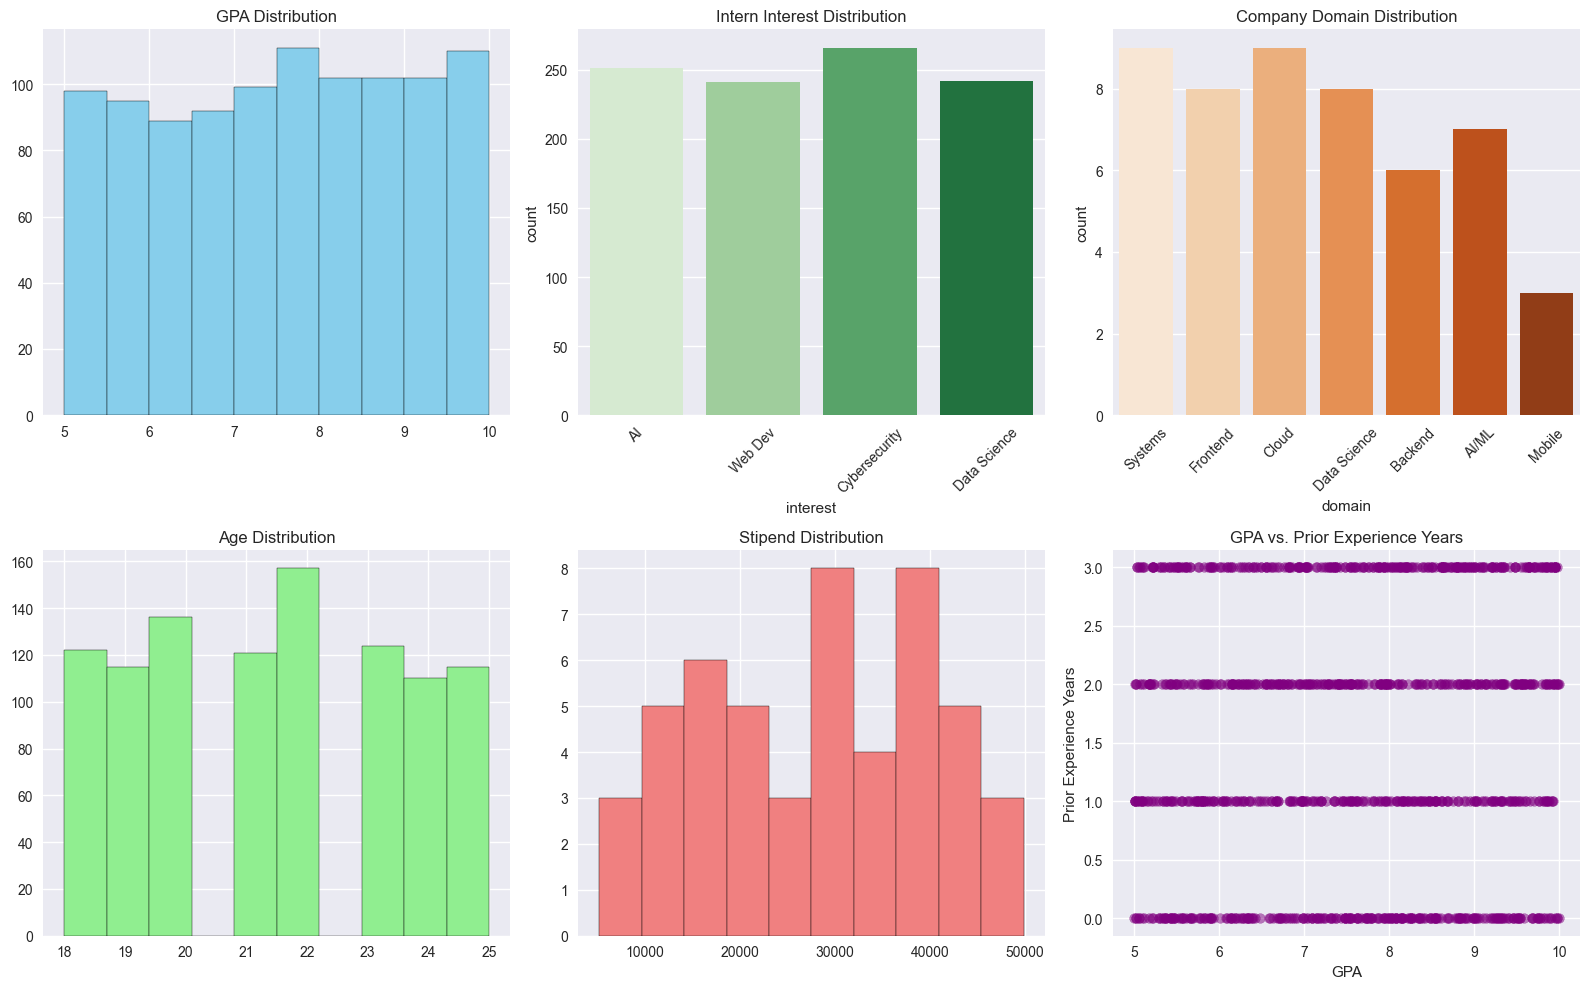


Cross-Validated Model Comparison Table:


,Model,Avg RMSE,Std RMSE
0,Random Forest,0.886232,0.026622
1,XGBoost,0.814676,0.020103



Best production model selected: XGBoost (Avg RMSE: 0.8147 ± 0.0201)

Feature Importance:


skills_similarity    0.305701
gpa_score            0.140663
interest_score       0.091038
location_score       0.179672
age_score            0.000811
experience_score     0.134689
duration_score       0.147424
dtype: float32


Allocation Insights:
- Allocation Rate: 15.90%
- Average Match Score for Allocated Interns: 63.94
- Total Allocated Stipend: 4225300

--- Allocated Interns ---


,intern_id,name,company_name,match_score,stipend,combined_score
0,830,Kavya Iyer,Company_41,89.703537,47400,63.076877
1,22,Ira Sharma,Company_27,84.817513,27700,59.538457
2,909,Meera Patel,Company_3,82.052536,28400,57.607175
3,163,Saanvi Das,Company_31,80.312431,16600,56.318300
4,718,Aadhya Joshi,Company_23,78.367180,21900,54.988425


Total Allocated: 159

--- Unallocated Interns ---


,intern_id,name,gpa,skills,interest,location
0,1,Arjun Sharma,8.98,"Java, Cybersecurity, Web Dev",ai,Mumbai
1,2,Aditya Nair,7.98,"Python, Cybersecurity, Web Dev, ML",web dev,Delhi
2,3,Aarav Iyer,5.29,"Cybersecurity, Web Dev",cybersecurity,Coimbatore
3,4,Riya Nair,8.54,"Python, Java, ML",data science,Madurai
4,5,Reyansh Kumar,8.61,"Python, Cybersecurity, ML",ai,Madurai


Total Unallocated: 841

Results exported to 'internship_allocations.csv' and 'unallocated_interns.csv'.


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')


try:
    interns_df = pd.read_csv('/Users/gokul/Desktop/ML project/interns_dataset.csv')
    companies_df = pd.read_csv('/Users/gokul/Desktop/ML project/companies_dataset.csv')
except FileNotFoundError as e:
    print(f"Error: {e}. Please check the file paths.")
    raise


print("\n--- EDA Summary ---")
print("Interns Dataset Info:")
display(interns_df.info())
print("\nCompanies Dataset Info:")
display(companies_df.info())

print("\nInterns Descriptive Statistics:")
display(interns_df.describe())
print("\nCompanies Descriptive Statistics:")
display(companies_df.describe())

# Business Insights from EDA
avg_gpa = interns_df['gpa'].mean()
most_common_interest = interns_df['interest'].mode()[0]
most_common_skill = interns_df['skills'].str.split(', ').explode().mode()[0]
total_slots = companies_df['slots'].sum()
avg_stipend = companies_df['stipend'].mean()
most_common_domain = companies_df['domain'].mode()[0]

print(f"\nBusiness Insights:")
print(f"- Average Intern GPA: {avg_gpa:.2f}")
print(f"- Most Common Intern Interest: {most_common_interest}")
print(f"- Most Common Skill Among Interns: {most_common_skill}")
print(f"- Total Available Slots: {total_slots}")
print(f"- Average Company Stipend: {avg_stipend:.2f}")
print(f"- Most Common Company Domain: {most_common_domain}")

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.hist(interns_df['gpa'], bins=10, color='skyblue', edgecolor='black')
plt.title('GPA Distribution')

plt.subplot(2, 3, 2)
sns.countplot(data=interns_df, x='interest', palette='Greens')
plt.title('Intern Interest Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.countplot(data=companies_df, x='domain', palette='Oranges')
plt.title('Company Domain Distribution')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
plt.hist(interns_df['age'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Age Distribution')

plt.subplot(2, 3, 5)
plt.hist(companies_df['stipend'], bins=10, color='lightcoral', edgecolor='black')
plt.title('Stipend Distribution')

plt.subplot(2, 3, 6)
plt.scatter(interns_df['gpa'], interns_df['prior_experience_years'], color='purple', alpha=0.5)
plt.title('GPA vs. Prior Experience Years')
plt.xlabel('GPA')
plt.ylabel('Prior Experience Years')

plt.tight_layout()
plt.show()


interns_df.fillna({'skills': '', 'interest': '', 'location': 'Unknown'}, inplace=True)
companies_df.fillna({'requirements': '', 'domain': '', 'location': 'Unknown', 'stipend': 0}, inplace=True)

def preprocess_text(text):
    if pd.isna(text):
        return ''
    return text.lower().strip().replace(',', ' ').replace('/', ' ')

interns_df['skills_processed'] = interns_df['skills'].apply(preprocess_text)
companies_df['requirements_processed'] = companies_df['requirements'].apply(preprocess_text)

interns_df['interest'] = interns_df['interest'].str.lower()
companies_df['domain'] = companies_df['domain'].str.lower()

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=100, stop_words='english')
all_text = pd.concat([interns_df['skills_processed'], companies_df['requirements_processed']])
tfidf.fit(all_text)
intern_skills_tfidf = tfidf.transform(interns_df['skills_processed'])
company_req_tfidf = tfidf.transform(companies_df['requirements_processed'])

scaler = StandardScaler()
interns_df['gpa_scaled'] = scaler.fit_transform(interns_df[['gpa']])
companies_df['stipend_scaled'] = scaler.fit_transform(companies_df[['stipend']])
companies_df['min_gpa_scaled'] = scaler.fit_transform(companies_df[['min_gpa']])
interns_df['age_scaled'] = scaler.fit_transform(interns_df[['age']])
interns_df['experience_scaled'] = scaler.fit_transform(interns_df[['prior_experience_years']])
interns_df['duration_scaled'] = scaler.fit_transform(interns_df[['preferred_duration_months']])

# FEATURE MATRIX
def create_feature_matrix(intern_skills_tfidf, company_req_tfidf, interns_df, companies_df):
    features = []
    for i in range(len(interns_df)):
        for j in range(len(companies_df)):
            # Use sparse TF-IDF matrices for cosine similarity
            skills_sim = cosine_similarity(intern_skills_tfidf[i:i+1], company_req_tfidf[j:j+1])[0][0]
            gpa_score = 0
            if interns_df.iloc[i]['gpa'] >= companies_df.iloc[j]['min_gpa']:
                gpa_score = min((interns_df.iloc[i]['gpa'] - companies_df.iloc[j]['min_gpa']) / (10.0 - companies_df.iloc[j]['min_gpa']), 1.0)
            interest_score = 1.0 if interns_df.iloc[i]['interest'] == companies_df.iloc[j]['domain'] else \
                             0.5 if (interns_df.iloc[i]['interest'] in companies_df.iloc[j]['domain'] or \
                                     companies_df.iloc[j]['domain'] in interns_df.iloc[i]['interest']) else 0.0
            location_score = 1.0 if interns_df.iloc[i]['location'] == companies_df.iloc[j]['location'] else 0.0
            age_score = min(interns_df.iloc[i]['age_scaled'] / 25, 1.0)
            experience_score = interns_df.iloc[i]['experience_scaled']
            duration_score = interns_df.iloc[i]['duration_scaled']
            features.append({
                'intern_id': interns_df.iloc[i]['intern_id'],
                'company_id': companies_df.iloc[j]['company_id'],
                'skills_similarity': skills_sim,
                'gpa_score': gpa_score,
                'interest_score': interest_score,
                'location_score': location_score,
                'age_score': age_score,
                'experience_score': experience_score,
                'duration_score': duration_score
            })
    return pd.DataFrame(features)

feature_matrix = create_feature_matrix(intern_skills_tfidf, company_req_tfidf, interns_df, companies_df)
X = feature_matrix[['skills_similarity', 'gpa_score', 'interest_score', 'location_score', 'age_score', 'experience_score', 'duration_score']]
y = (X['skills_similarity'] * 40 + X['gpa_score'] * 20 + X['interest_score'] * 15 + 
     X['location_score'] * 10 + X['age_score'] * 5 + X['experience_score'] * 5 + 
     X['duration_score'] * 5)

# MODEL TRAINING & CROSS-VALIDATION
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42, eval_metric='rmse')
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for name, model in models.items():
    cv_scores = []
    for train_idx, test_idx in cv.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cv_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    avg_rmse = np.mean(cv_scores)
    std_rmse = np.std(cv_scores)
    model.fit(X, y)  # Fit on full data for final prediction
    results.append([name, avg_rmse, std_rmse])

results_df = pd.DataFrame(results, columns=['Model', 'Avg RMSE', 'Std RMSE'])
print("\nCross-Validated Model Comparison Table:")
display(results_df)

# Choose the best model based on lowest average RMSE
best_idx = results_df['Avg RMSE'].idxmin()
best_model_name = results_df.iloc[best_idx]['Model']
best_model = models[best_model_name]
print(f"\nBest production model selected: {best_model_name} (Avg RMSE: {results_df.iloc[best_idx]['Avg RMSE']:.4f} ± {results_df.iloc[best_idx]['Std RMSE']:.4f})")

# Feature Importance
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
    print("\nFeature Importance:")
    display(feature_importance)

# CALCULATE MATCH SCORES
skills_sim_matrix = cosine_similarity(intern_skills_tfidf, company_req_tfidf)  # Shape: (1000, 50)
gpa_matrix = np.maximum(0, (interns_df['gpa'].values[:, None] - companies_df['min_gpa'].values[None, :]) / (10 - companies_df['min_gpa'].values[None, :]))  
interest_matrix = np.array([[1 if interns_df.iloc[i]['interest']==companies_df.iloc[j]['domain']
                             else 0.5 if interns_df.iloc[i]['interest'] in companies_df.iloc[j]['domain']
                             else 0
                             for j in range(len(companies_df))]
                            for i in range(len(interns_df))])  # Shape: (1000, 50)
location_matrix = (interns_df['location'].values[:, None] == companies_df['location'].values[None, :]).astype(float)  # Shape: (1000, 50)

# Broadcast intern-specific features to match company dimension
n_interns, n_companies = skills_sim_matrix.shape
age_matrix = np.repeat(interns_df['age_scaled'].values[:, None], n_companies, axis=1) / 25  # Shape: (1000, 50)
experience_matrix = np.repeat(interns_df['experience_scaled'].values[:, None], n_companies, axis=1)  # Shape: (1000, 50)
duration_matrix = np.repeat(interns_df['duration_scaled'].values[:, None], n_companies, axis=1)  # Shape: (1000, 50)

# Now all matrices have shape (1000, 50) and can be stacked
X_vectorized = np.stack([skills_sim_matrix, gpa_matrix, interest_matrix, location_matrix, 
                        age_matrix, experience_matrix, duration_matrix], axis=2).reshape(-1, 7)
predicted_scores = best_model.predict(X_vectorized).reshape(n_interns, n_companies)

# ALLOCATE INTERNS WITH WEIGHTED OPTIMIZATION
def allocate_internships(match_scores, interns_df, companies_df, weight_match=0.7, weight_stipend=0.3):
    allocations = []
    allocated_interns = set()
    company_slots = companies_df['slots'].tolist()
    combined_scores = (weight_match * match_scores + weight_stipend * (companies_df['stipend'].values / 50000))

    all_matches = [(combined_scores[i, j], i, j) for i in range(len(interns_df)) for j in range(len(companies_df))]
    all_matches.sort(reverse=True, key=lambda x: x[0])
    
    for score, intern_idx, company_idx in all_matches:
        if intern_idx not in allocated_interns and company_slots[company_idx] > 0:
            allocations.append({
                'intern_id': interns_df.iloc[intern_idx]['intern_id'],
                'name': interns_df.iloc[intern_idx]['name'],
                'company_name': companies_df.iloc[company_idx]['company_name'],
                'match_score': match_scores[intern_idx, company_idx],
                'stipend': companies_df.iloc[company_idx]['stipend'],
                'combined_score': score
            })
            allocated_interns.add(intern_idx)
            company_slots[company_idx] -= 1
    
    return pd.DataFrame(allocations)

allocation_df = allocate_internships(predicted_scores, interns_df, companies_df)
unallocated_df = interns_df[~interns_df['intern_id'].isin(allocation_df['intern_id'])]

# Business Insights on Allocation
allocation_rate = (len(allocation_df) / len(interns_df)) * 100 if len(interns_df) > 0 else 0
avg_match_score = allocation_df['match_score'].mean() if not allocation_df.empty else 0
total_stipend = allocation_df['stipend'].sum()
print(f"\nAllocation Insights:")
print(f"- Allocation Rate: {allocation_rate:.2f}%")
print(f"- Average Match Score for Allocated Interns: {avg_match_score:.2f}")
print(f"- Total Allocated Stipend: {total_stipend}")

# Display Results
print("\n--- Allocated Interns ---")
display(allocation_df.head())
print(f"Total Allocated: {len(allocation_df)}")

print("\n--- Unallocated Interns ---")
display(unallocated_df[['intern_id', 'name', 'gpa', 'skills', 'interest', 'location']].head())
print(f"Total Unallocated: {len(unallocated_df)}")

# Export Results to CSV
allocation_df.to_csv("internship_allocations.csv", index=False)
unallocated_df.to_csv("unallocated_interns.csv", index=False)
print("\nResults exported to 'internship_allocations.csv' and 'unallocated_interns.csv'.")